# Author : Bhavya J Patel
### Task-8 Timeline Analysis_Covid-19

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline
sns.set()
import warnings as wg
wg.filterwarnings("ignore")


In [5]:
df = pd.read_csv("owid-covid-data.csv")

In [6]:
df.head(10)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [7]:
df.tail(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
241003,ZWE,Africa,Zimbabwe,2022-11-28,257893.0,0.0,0.000,5606.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
241004,ZWE,Africa,Zimbabwe,2022-11-29,257893.0,0.0,0.000,5606.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
241005,ZWE,Africa,Zimbabwe,2022-11-30,259164.0,1271.0,181.571,5620.0,14.0,2.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
241006,ZWE,Africa,Zimbabwe,2022-12-01,259164.0,0.0,181.571,5620.0,0.0,2.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
241007,ZWE,Africa,Zimbabwe,2022-12-02,259164.0,0.0,181.571,5620.0,0.0,2.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
241008,ZWE,Africa,Zimbabwe,2022-12-03,259164.0,0.0,181.571,5620.0,0.0,2.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
241009,ZWE,Africa,Zimbabwe,2022-12-04,259164.0,0.0,181.571,5620.0,0.0,2.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
241010,ZWE,Africa,Zimbabwe,2022-12-05,259164.0,0.0,181.571,5620.0,0.0,2.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
241011,ZWE,Africa,Zimbabwe,2022-12-06,259356.0,192.0,209.000,5622.0,2.0,2.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
241012,ZWE,Africa,Zimbabwe,2022-12-07,259356.0,NaN,NaN,5622.0,0.0,0.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [8]:
df.describe()


,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.270850e+05,2.268000e+05,2.256010e+05,2.077090e+05,207623.000000,206439.000000,226050.000000,225765.000000,224571.000000,206687.000000,...,144781.000000,95424.000000,172534.000000,221098.000000,189126.000000,2.399780e+05,8.087000e+03,8087.000000,8116.000000,8087.000000
mean,4.772238e+06,1.217139e+04,1.220219e+04,7.632478e+04,133.000920,133.626283,65302.589289,186.077085,186.284432,713.645491,...,32.814462,50.895889,3.088185,73.612599,0.724689,1.408477e+08,4.977151e+04,10.085970,14.215795,1411.092772
std,2.965841e+07,8.396452e+04,8.198878e+04,3.910254e+05,713.198871,698.883230,113714.655640,1161.299890,687.194489,995.945203,...,13.536641,31.874402,2.551468,7.446440,0.149600,6.925588e+08,1.370660e+05,13.403121,26.063144,1778.219605
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-28.450000,-95.920000,-1984.281517
25%,4.957000e+03,0.000000e+00,5.429000e+00,1.170000e+02,0.000000,0.000000,1174.913500,0.000000,1.174000,31.748000,...,21.600000,20.859000,1.300000,69.500000,0.602000,8.367830e+05,5.320000e+01,0.740000,0.030000,37.336276
50%,5.546000e+04,4.700000e+01,8.757100e+01,1.257000e+03,1.000000,1.286000,11434.372000,6.372000,17.941000,226.603000,...,33.100000,49.839000,2.500000,75.050000,0.742000,6.948395e+06,6.301800e+03,7.640000,7.415000,852.109416
75%,5.688600e+05,9.110000e+02,1.081571e+03,1.034300e+04,13.000000,14.857000,78111.601750,92.072000,131.079500,1058.770000,...,41.300000,83.241000,4.200000,79.070000,0.838000,3.369661e+07,3.612080e+04,15.770000,19.392500,2261.224282
max,6.469123e+08,4.083952e+06,3.439392e+06,6.646070e+06,17733.000000,14859.286000,690003.538000,228872.025000,36421.827000,6388.976000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.240683e+06,76.550000,376.710000,10032.844512


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241013 entries, 0 to 241012
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    241013 non-null  object 
 1   continent                                   227456 non-null  object 
 2   location                                    241013 non-null  object 
 3   date                                        241013 non-null  object 
 4   total_cases                                 227085 non-null  float64
 5   new_cases                                   226800 non-null  float64
 6   new_cases_smoothed                          225601 non-null  float64
 7   total_deaths                                207709 non-null  float64
 8   new_deaths                                  207623 non-null  float64
 9   new_deaths_smoothed                         206439 non-null  float64
 

In [10]:
df.shape


(241013, 67)

In [11]:
duplicate_rows_df = df[df.duplicated()]

print("Number of duplicate rows: ", duplicate_rows_df.shape)


Number of duplicate rows:  (0, 67)


In [12]:
df.count() #Used to count the number of rows


iso_code                                   241013
continent                                  227456
location                                   241013
date                                       241013
total_cases                                227085
                                            ...  
population                                 239978
excess_mortality_cumulative_absolute         8087
excess_mortality_cumulative                  8087
excess_mortality                             8116
excess_mortality_cumulative_per_million      8087
Length: 67, dtype: int64

In [13]:
print(df.isnull().sum())


iso_code                                        0
continent                                   13557
location                                        0
date                                            0
total_cases                                 13928
                                            ...  
population                                   1035
excess_mortality_cumulative_absolute       232926
excess_mortality_cumulative                232926
excess_mortality                           232897
excess_mortality_cumulative_per_million    232926
Length: 67, dtype: int64


In [14]:
df1 = df[["date", "total_cases", "new_cases", "total_deaths", "new_tests", "total_tests"]]

df1.head()


,date,total_cases,new_cases,total_deaths,new_tests,total_tests
0,2020-02-24,5.0,5.0,NaN,NaN,NaN
1,2020-02-25,5.0,0.0,NaN,NaN,NaN
2,2020-02-26,5.0,0.0,NaN,NaN,NaN
3,2020-02-27,5.0,0.0,NaN,NaN,NaN
4,2020-02-28,5.0,0.0,NaN,NaN,NaN


In [18]:
df1.head()


,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2020-02-24,5.0,5.0,NaN,NaN,NaN
2020-02-25,5.0,0.0,NaN,NaN,NaN
2020-02-26,5.0,0.0,NaN,NaN,NaN
2020-02-27,5.0,0.0,NaN,NaN,NaN
2020-02-28,5.0,0.0,NaN,NaN,NaN


In [19]:
df1.tail()


,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2022-12-03,259164.0,0.0,5620.0,NaN,NaN
2022-12-04,259164.0,0.0,5620.0,NaN,NaN
2022-12-05,259164.0,0.0,5620.0,NaN,NaN
2022-12-06,259356.0,192.0,5622.0,NaN,NaN
2022-12-07,259356.0,NaN,5622.0,NaN,NaN


Text(0.5, 0, 'Month')

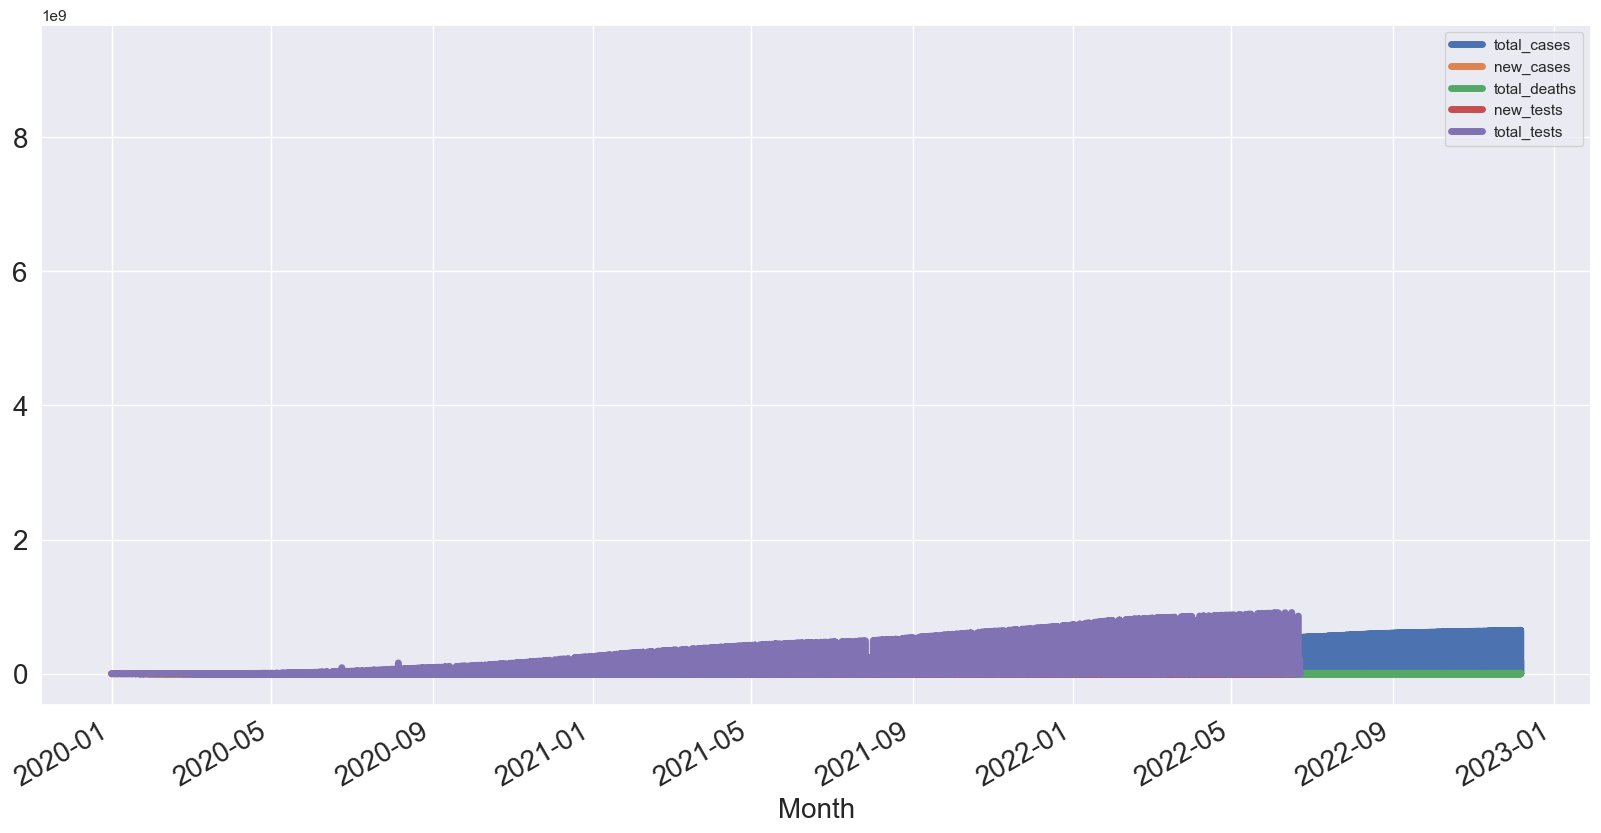

In [20]:
df1.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

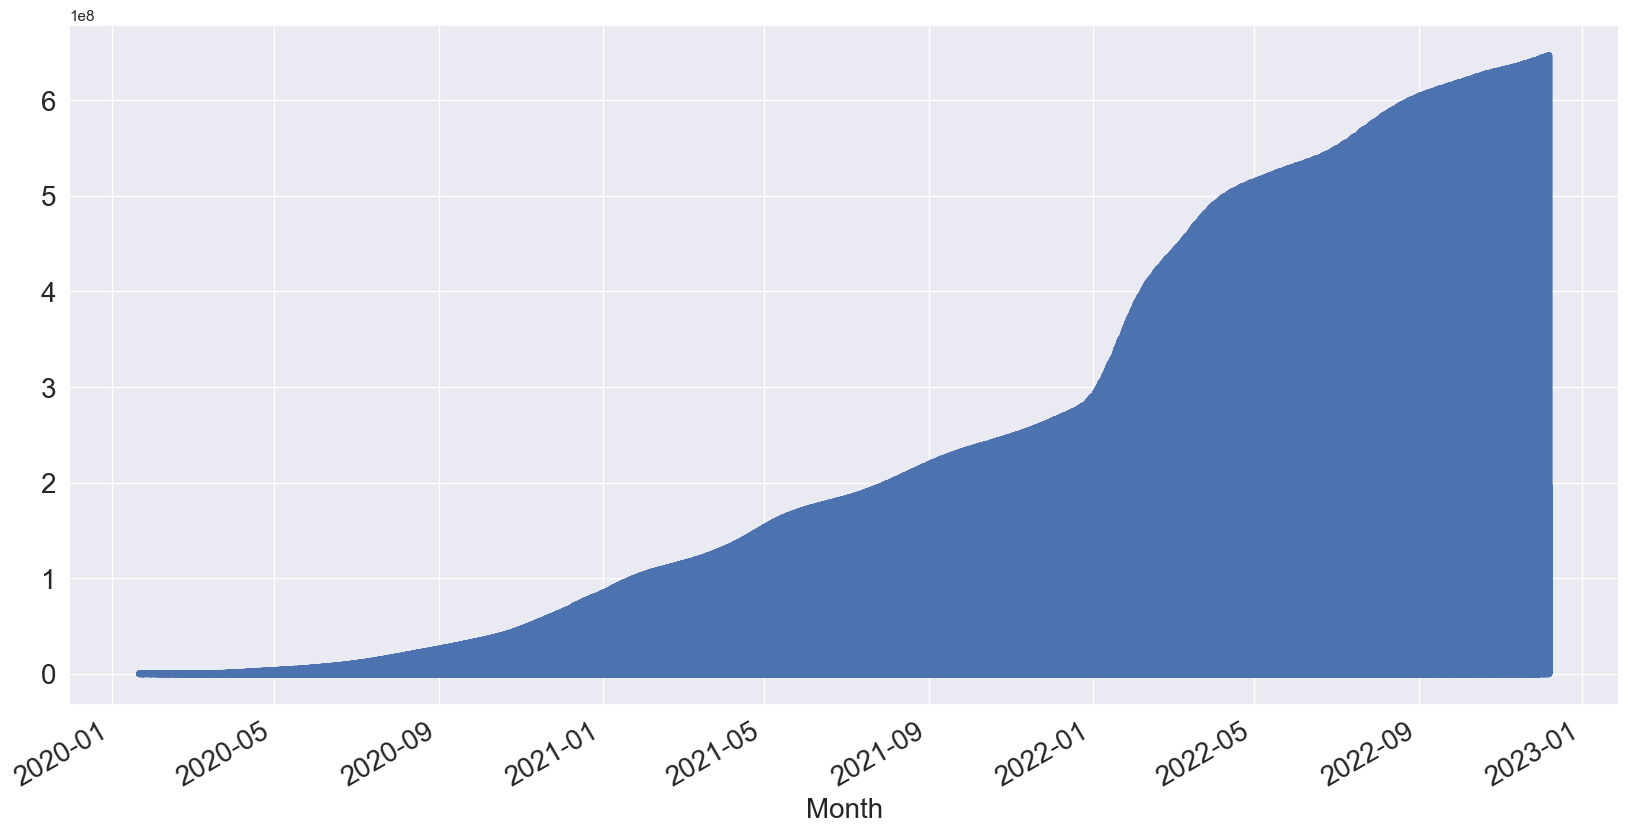

In [21]:
df1.total_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

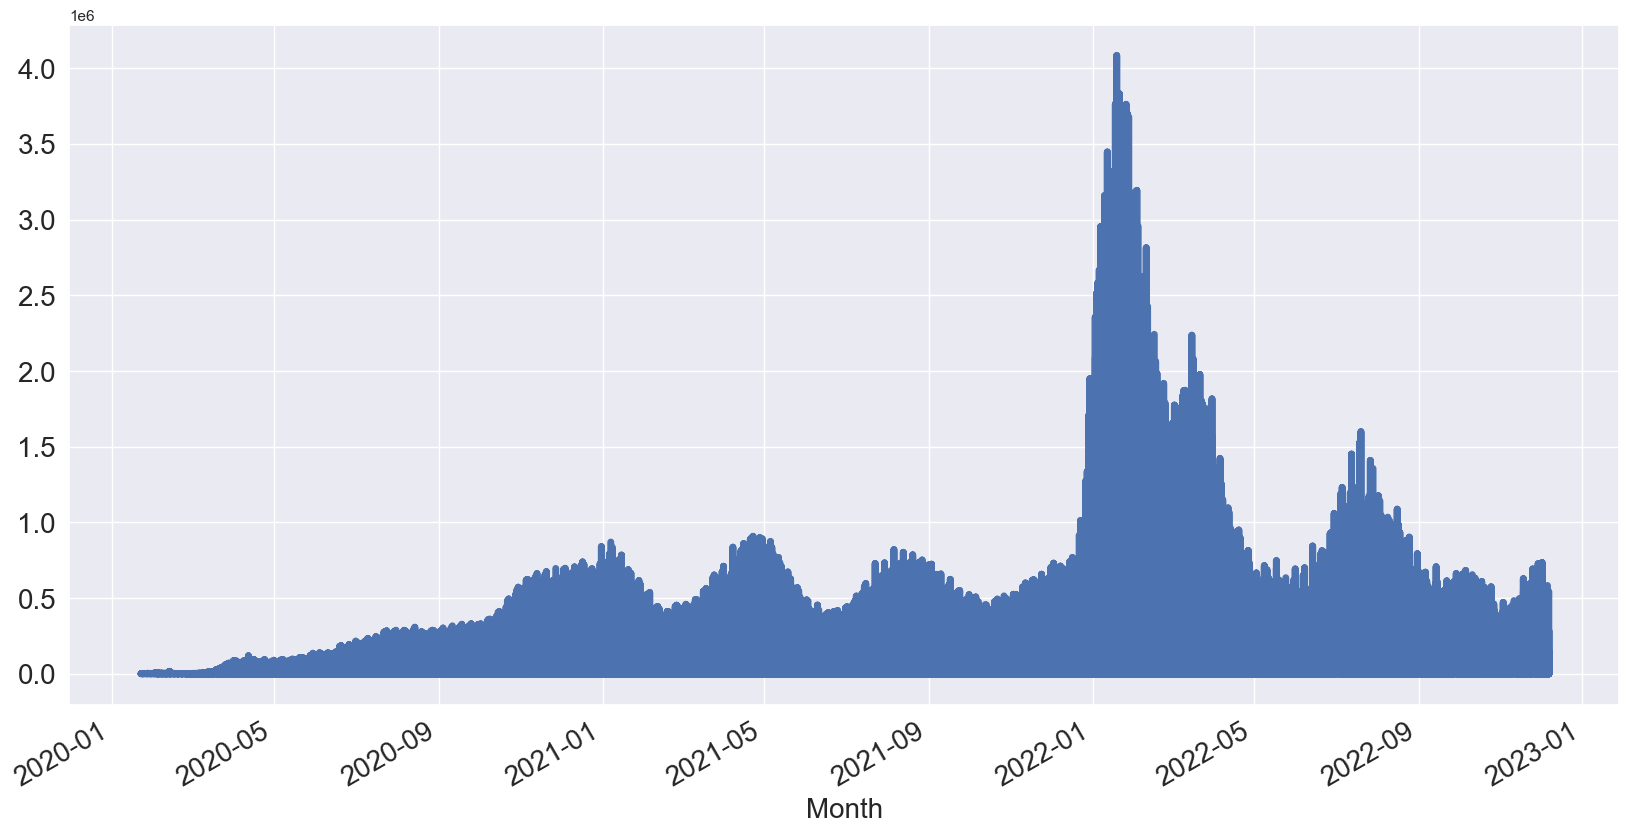

In [22]:
df1.new_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)


Text(0.5, 0, 'Month')

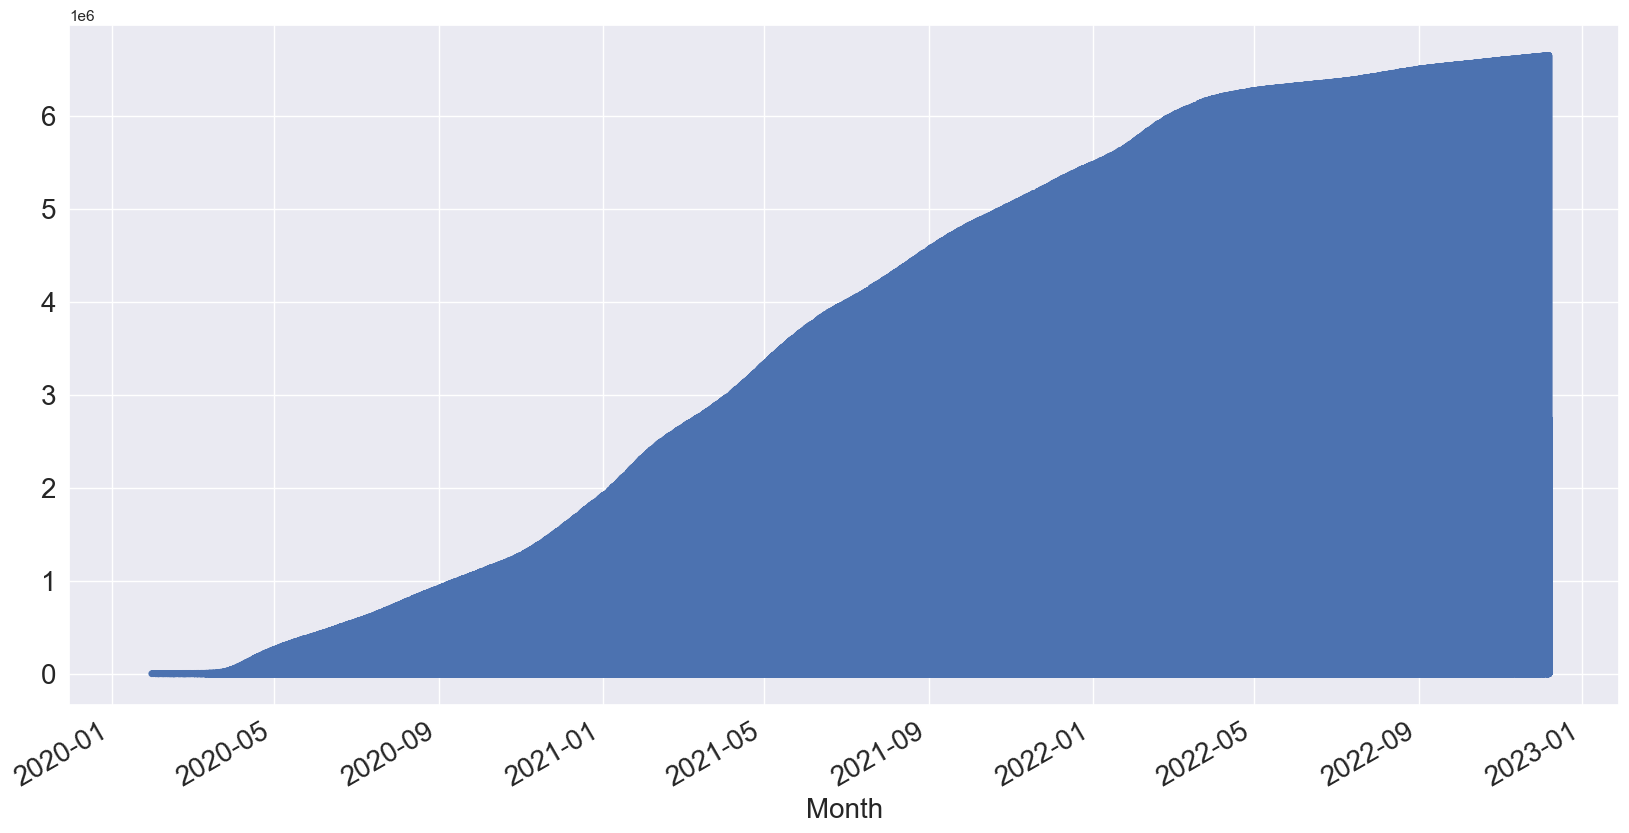

In [23]:
df1.total_deaths.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

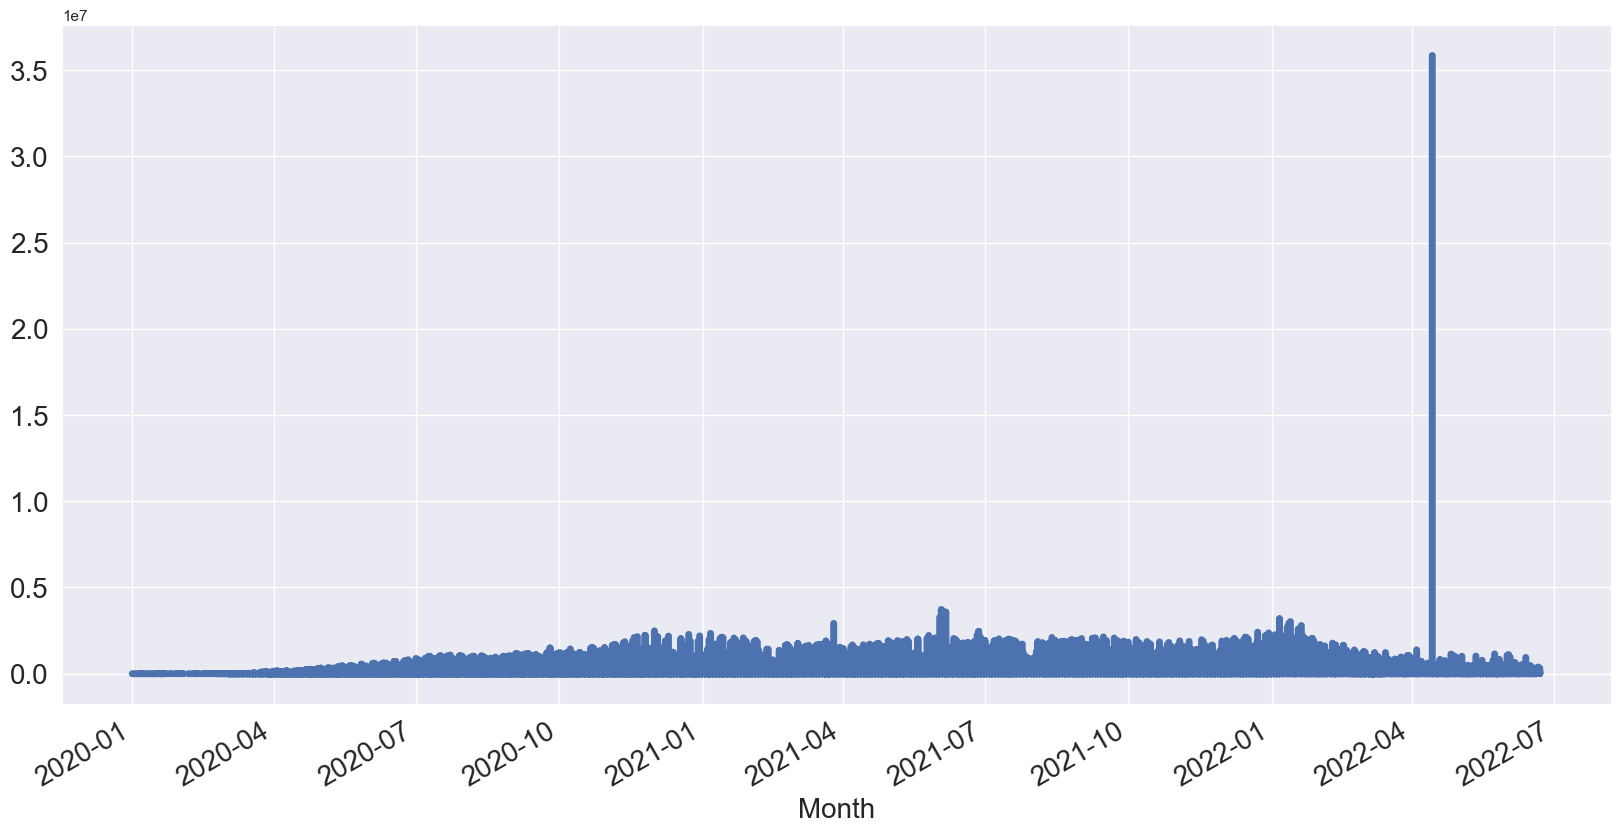

In [24]:
df1.new_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

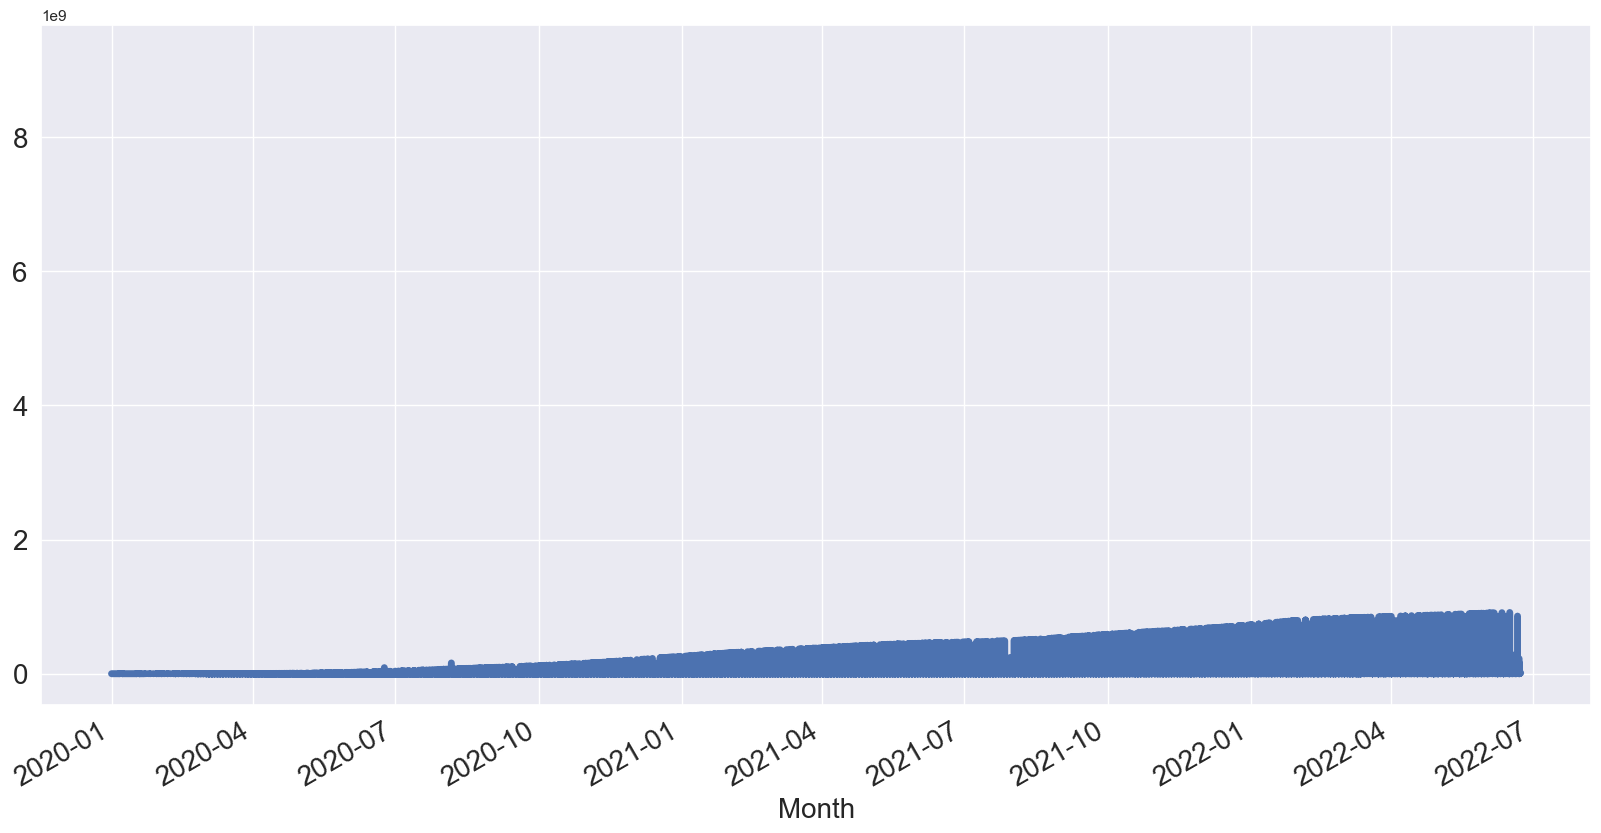

In [25]:
df1.total_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)



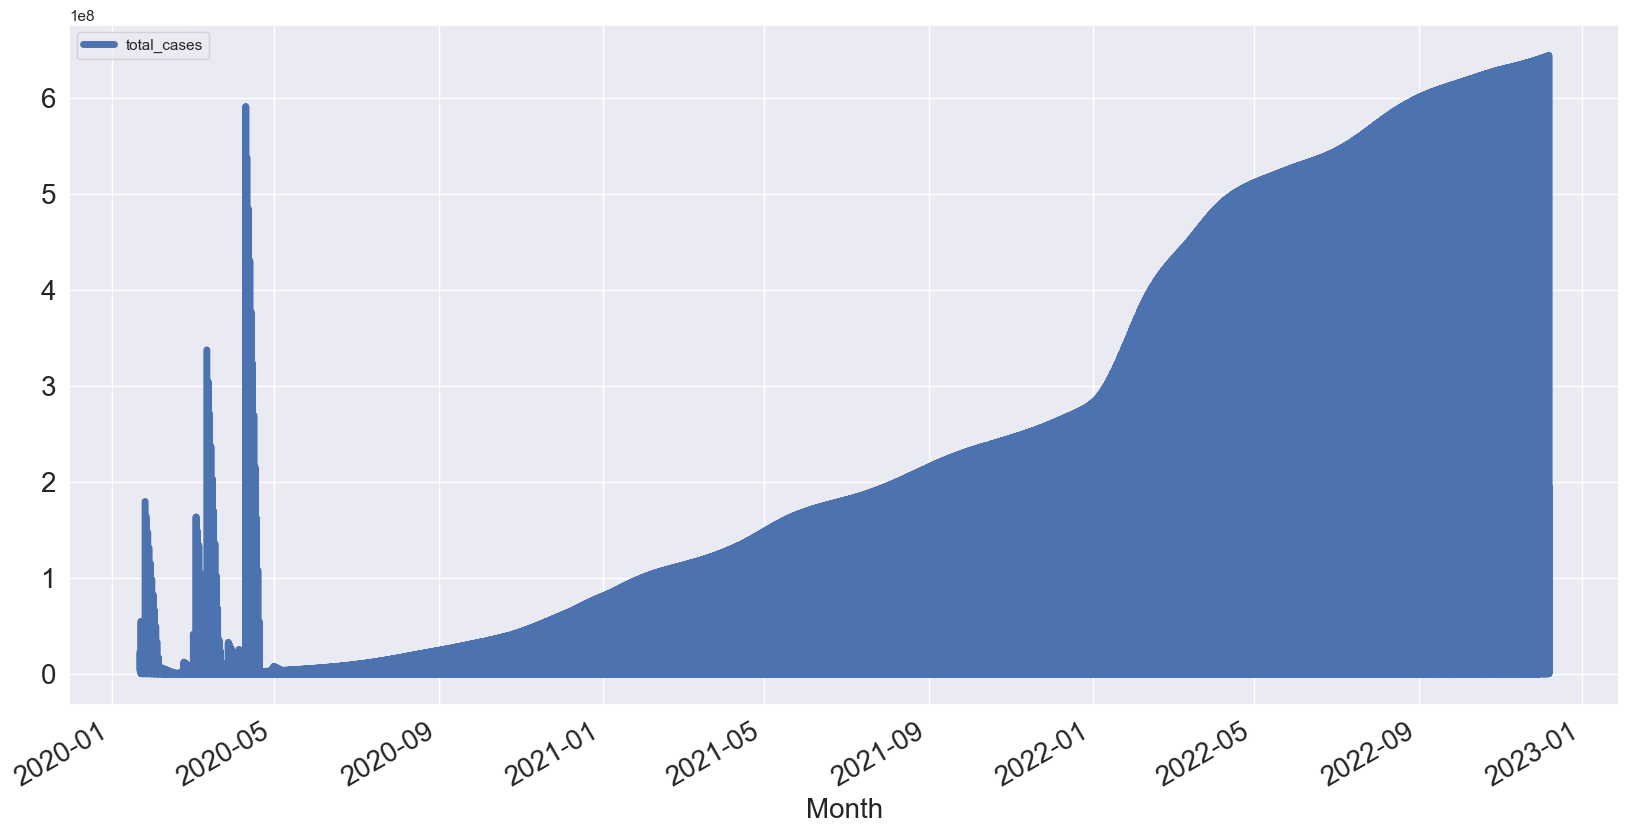

In [26]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);


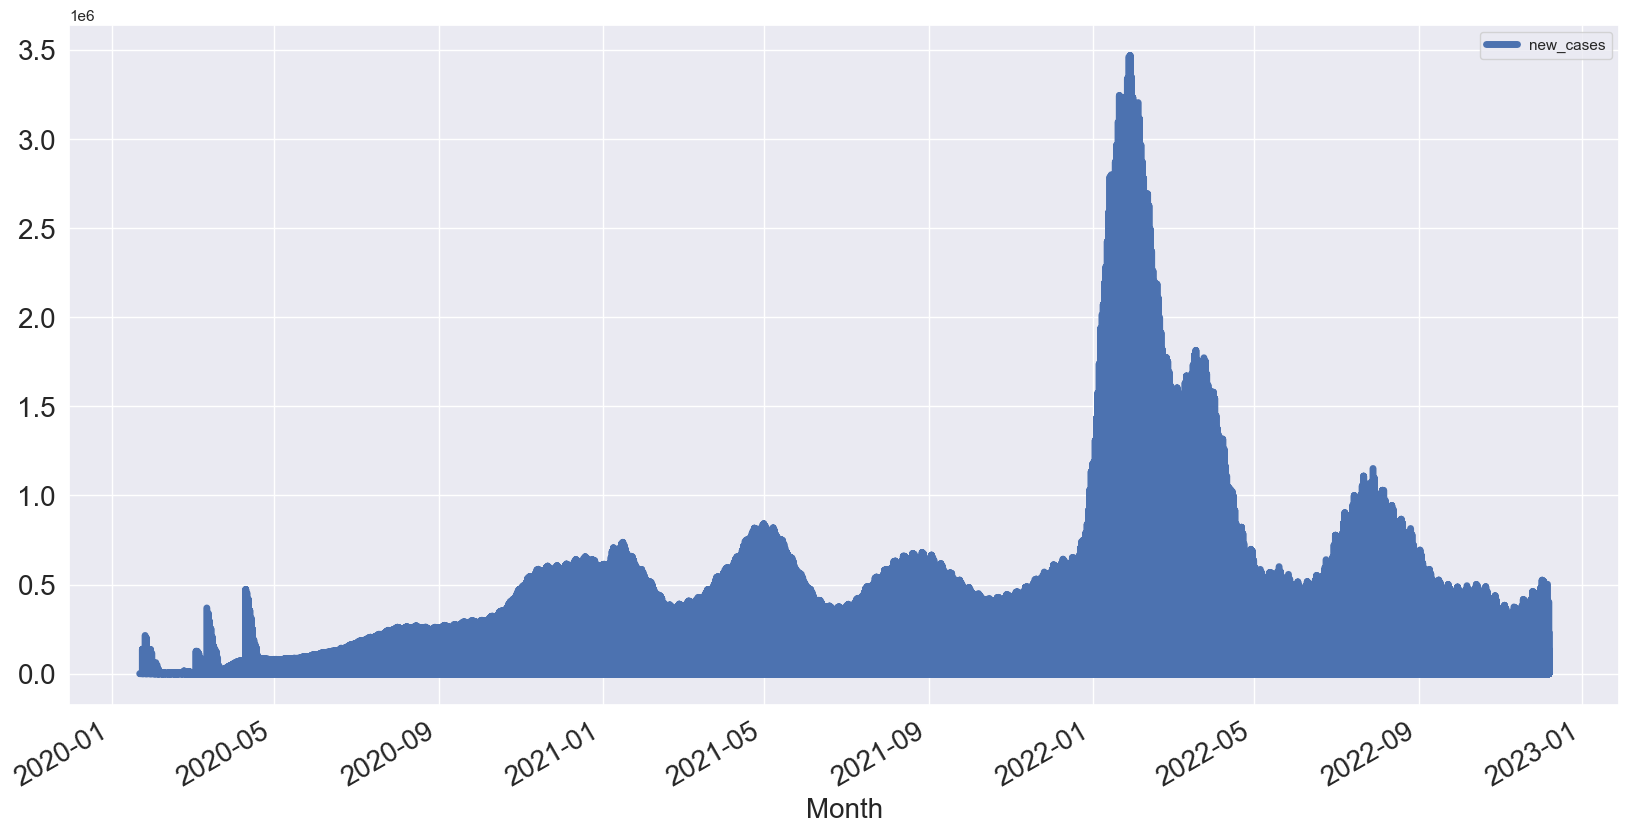

In [27]:
new_cases = df1[['new_cases']]
new_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);


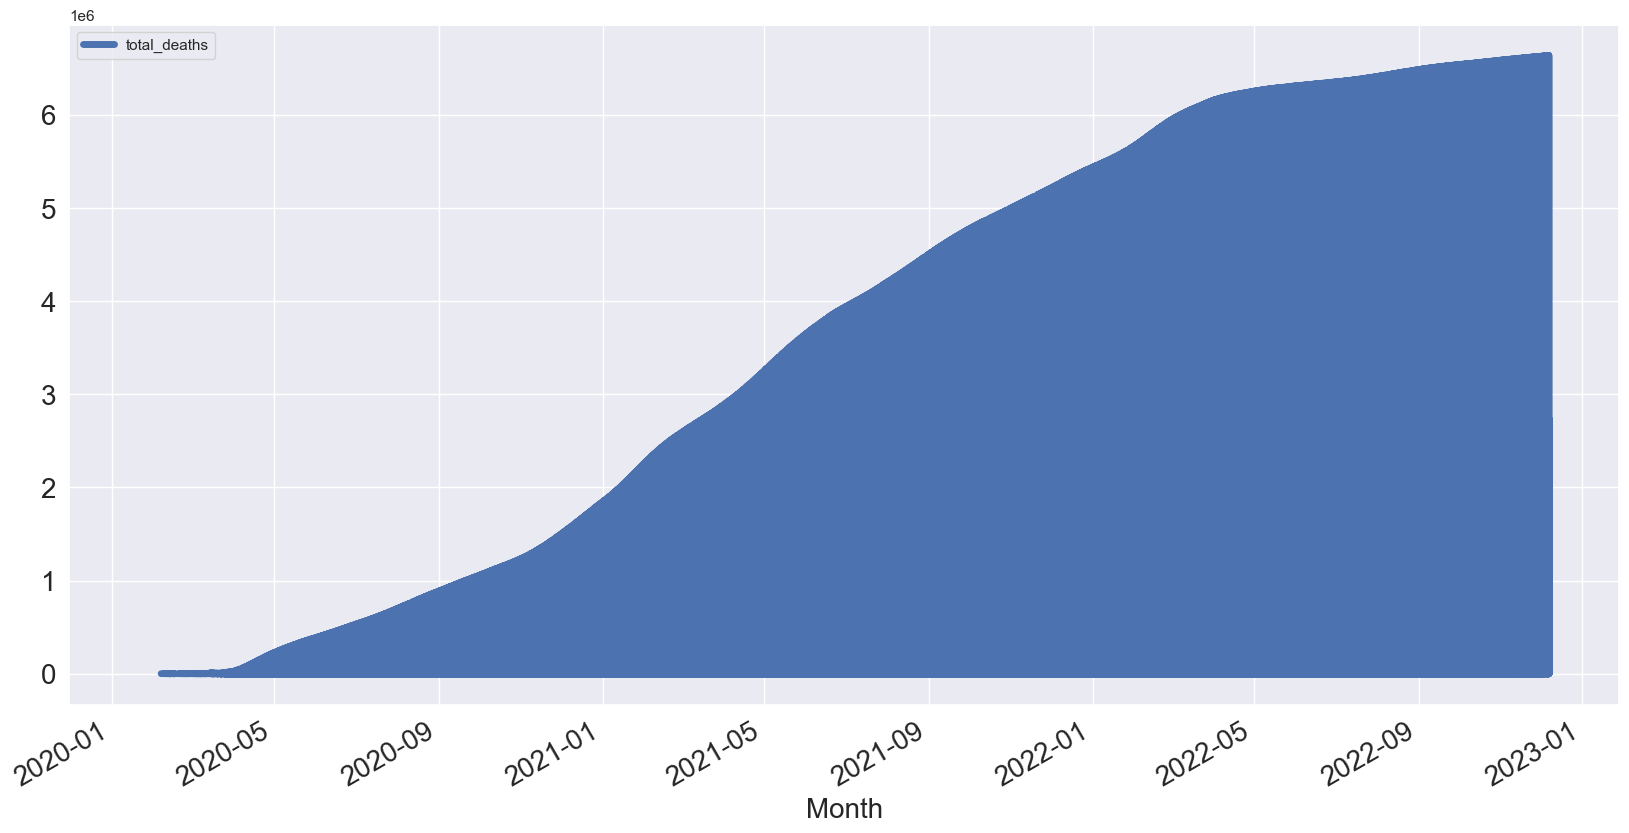

In [28]:
total_deaths = df1[['total_deaths']]
total_deaths.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);


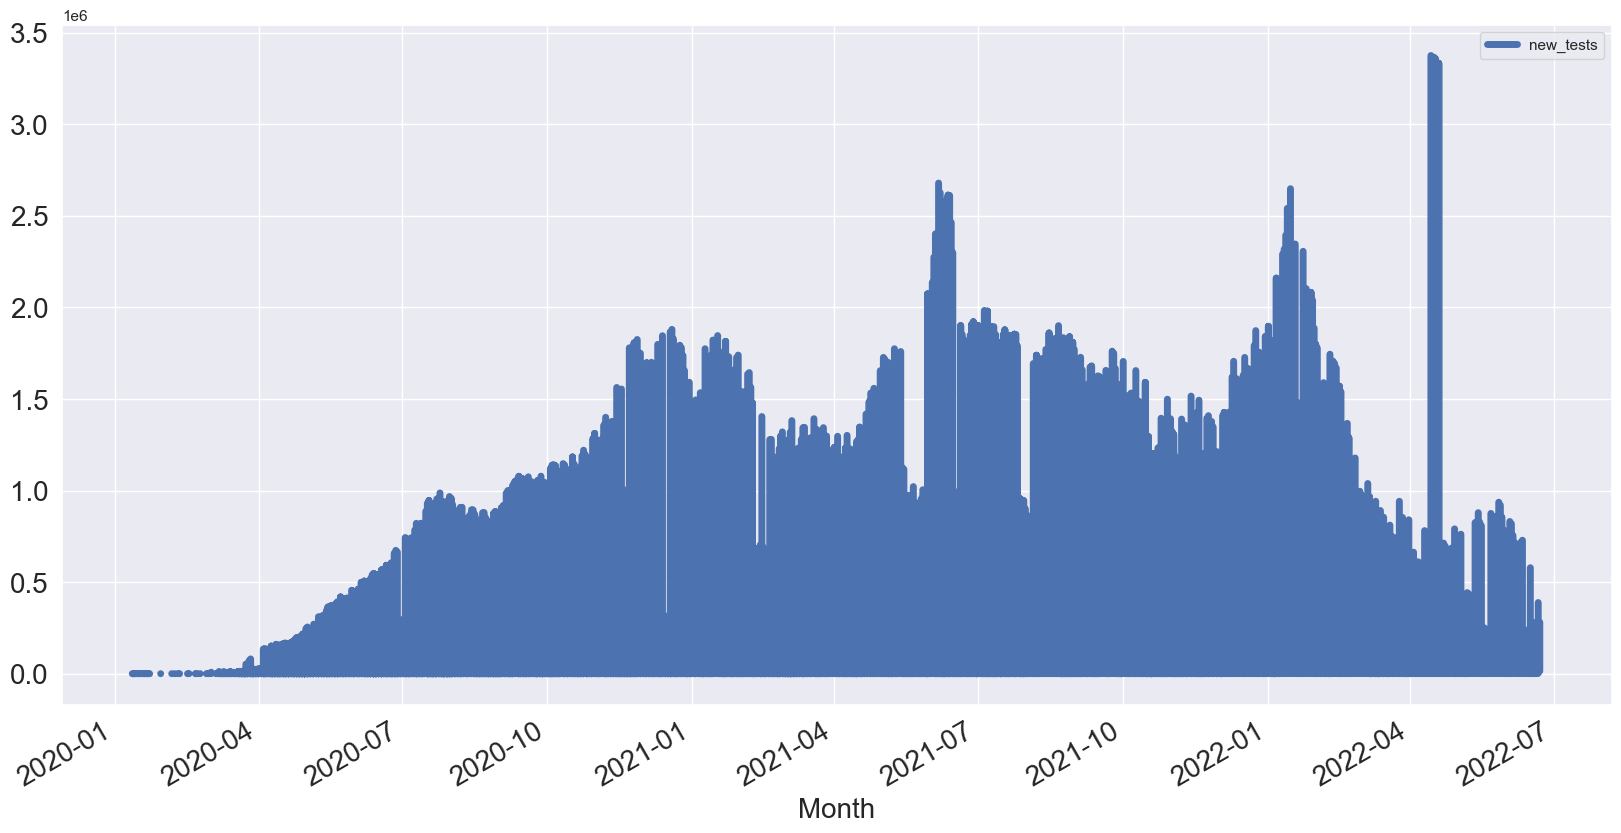

In [29]:
new_tests = df1[['new_tests']]
new_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

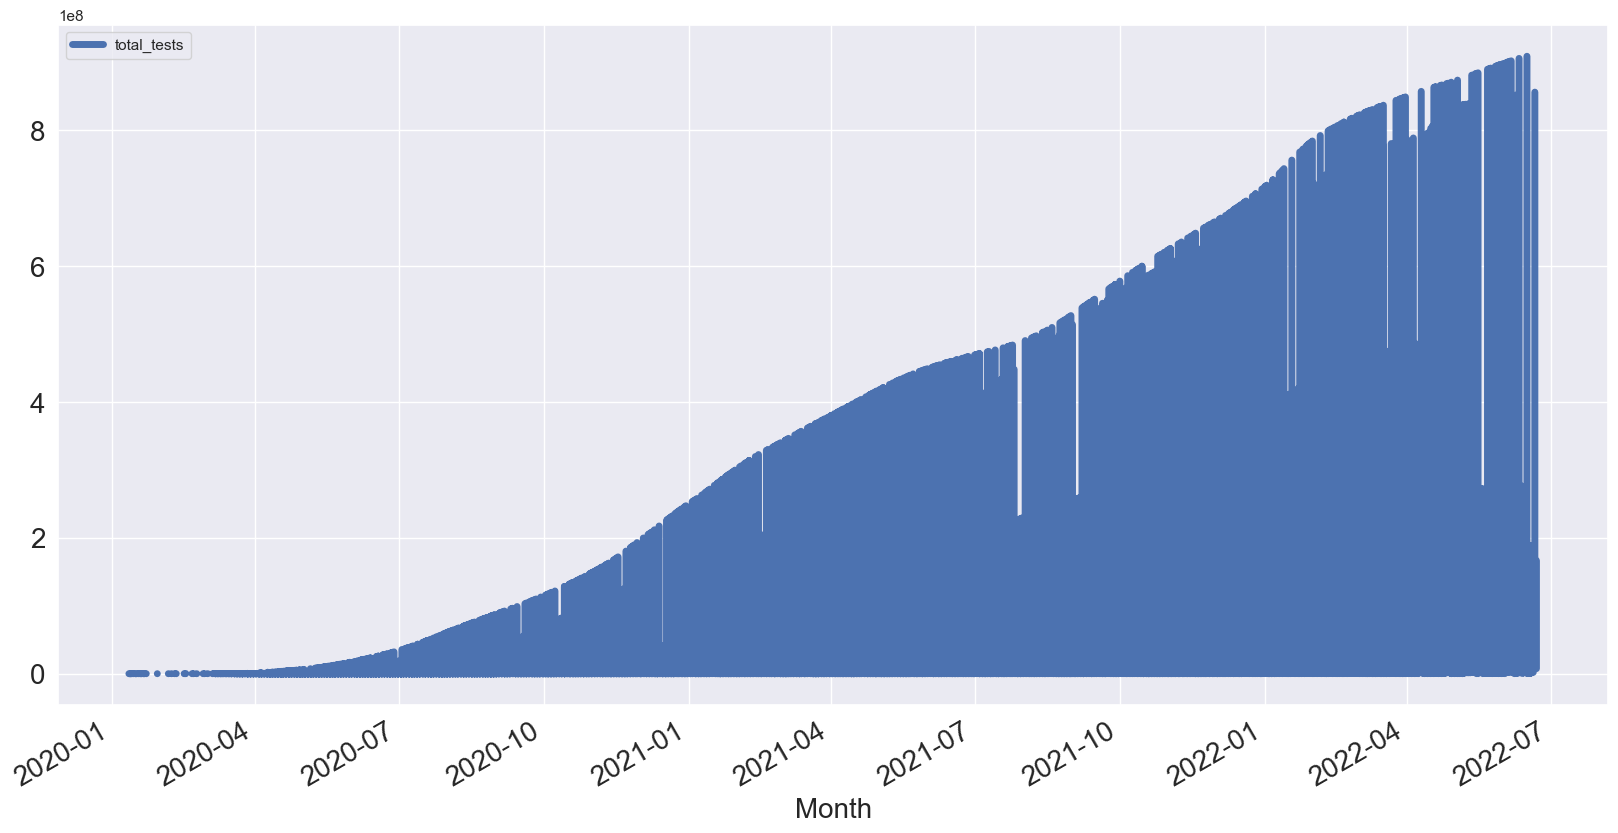

In [30]:
total_tests = df1[['total_tests']]
total_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);


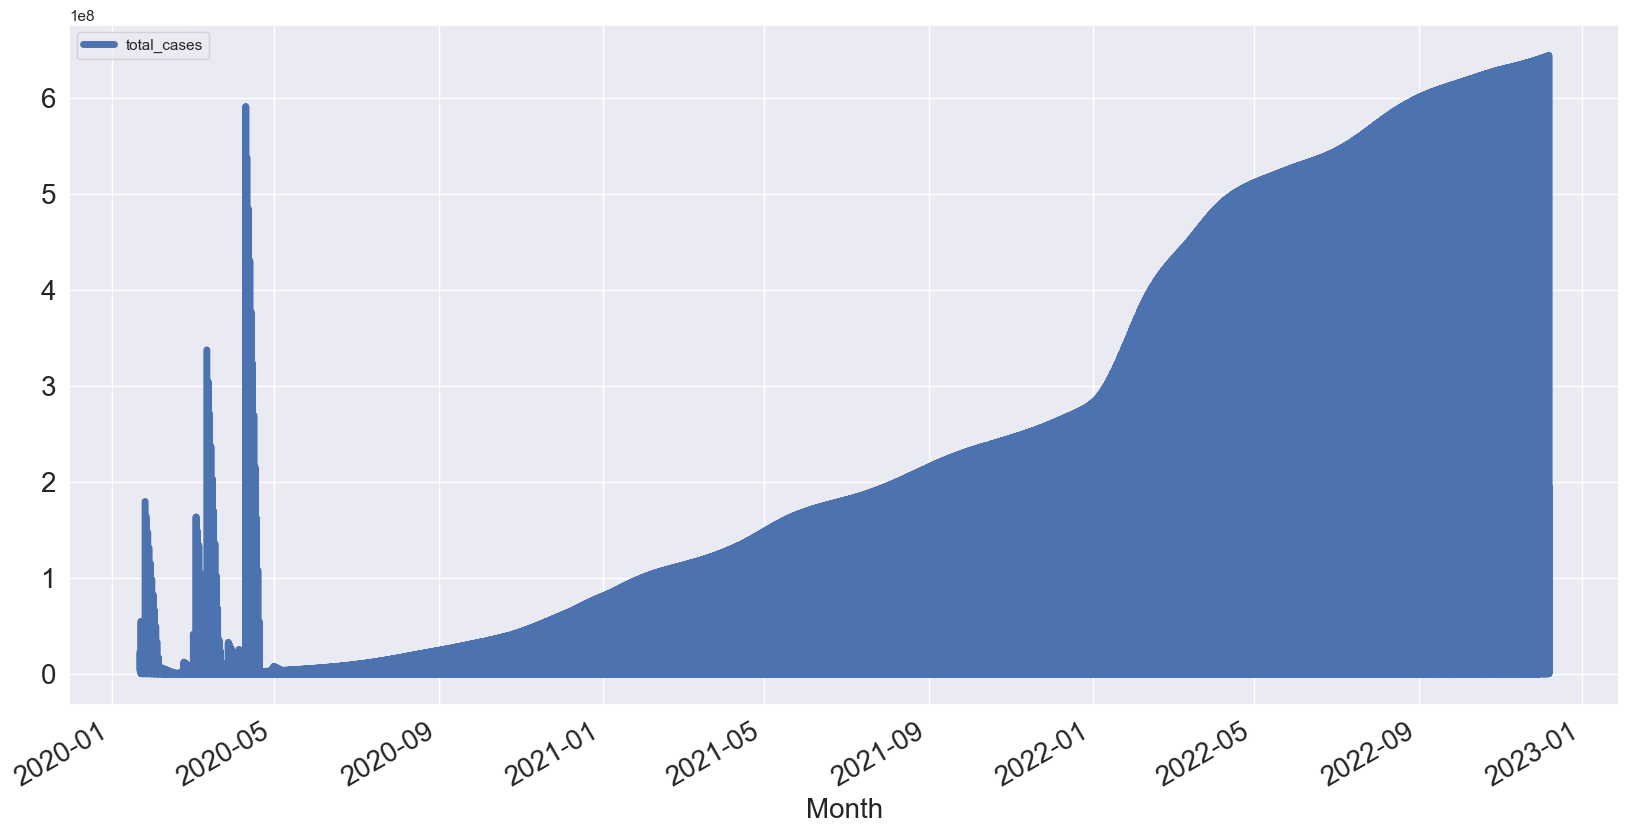

In [31]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);


In [33]:
df_rm = pd.concat([total_cases.rolling(12).mean(), total_deaths.rolling(12).mean(), axis = 1])
df_rm.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

SyntaxError: invalid syntax (2761542236.py, line 1)